# Planar data classification with 2-layer neural network

# 1 - Packages
Let's first import all the packages that you will need during this assignment.

 - numpy is the fundamental package for scientific computing with Python.
 - sklearn provides simple and efficient tools for data mining and data analysis.
 - matplotlib is a library for plotting graphs in Python.
 - testCases provides some test examples to assess the correctness of your functions
 - planar_utils provide various useful functions used i

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
#from testCases_v2 import *
import sklearn
from planar_utils import sigmoid

import h5py
import scipy
from PIL import Image
from scipy import ndimage

import seaborn as sns
%matplotlib inline

np.random.seed(5) # set a seed so that the resu

Let's make the activation functions

In [2]:
def ReLU(x):
    return x * (x > 0)


def ReLU_derivative(x):
    return x >= 0


def tanh_out(x):
    return np.tanh(x)/2.00001+0.5

# 2 - Dataset
First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables X and Y.

In [3]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


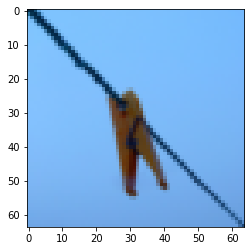

In [5]:
index = 64
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [6]:
m_train = len(train_set_x_orig)
m_test = len(test_set_x_orig)
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [7]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.
One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let’s standardize our dataset.

In [8]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

In [9]:
X=train_set_x
Y=train_set_y
shape_X = X.shape
shape_Y = Y.shape

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))

The shape of X is: (12288, 209)
The shape of Y is: (1, 209)


# 3 - NN model

In [10]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y,zeroes=False):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    ### START CODE HERE ### (≈ 4 lines of code)
    if zeroes:
        W1 = np.zeros((n_h, n_x))
        b1 = np.zeros((n_h, 1))
        W2 = np.zeros((n_y, n_h))
        b2 = np.zeros((n_y, 1))
    else:
        W1 = np.random.randn(n_h, n_x) * 0.01
        b1 = np.zeros((n_h, 1))
        W2 = np.random.randn(n_y, n_h) * 0.01
        b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [11]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters,active_1,active_2):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###

    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = active_1(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = active_2(Z2)
    ### END CODE HERE ###

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [12]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function,
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]

    Returns:
    cost -- cross-entropy cost given equation (13)

    """

    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = - np.sum(logprobs) / m
    ### END CODE HERE ###

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.
    assert(isinstance(cost, float))

    return cost

In [13]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y,active_1,active_2):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###

    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###

    # Backward propagation: calculate dW1, db1, dW2, db2.
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    if active_1==np.tanh:
        dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    if active_1==ReLU:
        dZ1= np.dot(W2.T, dZ2) *ReLU_derivative(A1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [14]:
# GRADED FUNCTION: update_parameters

# def update_parameters(parameters, grads, learning_rate = 1.2):
def update_parameters(parameters, grads, learning_rate = 0.01):

    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###

    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###

    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [15]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h=4, active_1=np.tanh,active_2=sigmoid, num_iterations = 10000, print_cost=False, Learning_rates=[0.01],zeroes_initial=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    #     np.random.seed(5)

    #     n_x = layer_sizes(X, Y)[0]
    #     n_y = layer_sizes(X, Y)[2]


    n_x = X.shape[0] # size of input layer
    n_y = Y.shape[0] # size of output layer

    # Initialize parameters
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y,zeroes_initial)
    ### END CODE HERE ###

    # Loop (gradient descent)
    costs=list()

    k=-1
    Mod=np.ceil(num_iterations/len(Learning_rates))
    #     Mod=int(num_iterations/len(Learning_rates))

    learning_rate=Learning_rates[0]


    for i in range(0, num_iterations):

        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters,active_1,active_2)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y,active_1,active_2)

        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".

        if i%Mod==0:
            k+=1
            learning_rate=Learning_rates[k]
        parameters = update_parameters(parameters, grads,learning_rate)

        ### END CODE HERE ###

        # Print the cost every 1000 iterations
        #         if print_cost and i % 1000 == 0:
        if print_cost and i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

        if i%100==0:
            costs.append(cost)


    return (np.squeeze(costs),parameters)

In [16]:
# GRADED FUNCTION: predict

def predict(parameters, X,active_1=np.tanh,active_2=sigmoid):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters,active_1,active_2)
    predictions = (A2 > 0.5).astype('int')
    ### END CODE HERE ###

    return predictions

In [17]:
def plt_costs(costs,label):
    plt.plot(costs, label=label)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    legend = plt.legend(loc='upper center', shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')

In [18]:
def print_accuracy(parameters,activ_1,activ_2):
    predictions = predict(parameters, X,activ_1,activ_2)
    print ('Train accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
    predictions = predict(parameters, test_set_x,activ_1,activ_2)
    print ('Test accuracy: %d' % float((np.dot(test_set_y,predictions.T) + np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100) + '%')
    print()

Parametrs

In [19]:
#Print accuracy

print("tanh+sigmoid")
costs1, parameters1 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=sigmoid, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters1, activ_1=np.tanh,activ_2=sigmoid)


print("ReLU+sigmoid")
costs2, parameters2 = nn_model(X, Y, n_h = 4, active_1=ReLU,active_2=sigmoid, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters2, activ_1=ReLU,activ_2=sigmoid)


print("tanh+tanh")
costs3, parameters3 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters3, activ_1=np.tanh,activ_2=tanh_out)


print("ReLU+tanh")
costs4, parameters4 = nn_model(X, Y, n_h = 4, active_1=ReLU,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters4, activ_1=ReLU,activ_2=tanh_out)

tanh+sigmoid
Cost after iteration 0: 0.695140
Cost after iteration 500: 0.547163
Cost after iteration 1000: 0.355807
Cost after iteration 1500: 0.159346
Cost after iteration 2000: 0.094139
Cost after iteration 2500: 0.056281
Cost after iteration 3000: 0.040911
Cost after iteration 3500: 0.031569
Cost after iteration 4000: 0.025181
Cost after iteration 4500: 0.020740
Cost after iteration 5000: 0.017623
Train accuracy: 100%
Test accuracy: 68%

ReLU+sigmoid
Cost after iteration 0: 0.693863
Cost after iteration 500: 0.525143
Cost after iteration 1000: 0.495579
Cost after iteration 1500: 0.479777
Cost after iteration 2000: 0.462702
Cost after iteration 2500: 0.440138
Cost after iteration 3000: 0.335570
Cost after iteration 3500: 0.234821
Cost after iteration 4000: 0.225002
Cost after iteration 4500: 0.121076
Cost after iteration 5000: 0.071977
Train accuracy: 97%
Test accuracy: 76%

tanh+tanh
Cost after iteration 0: 0.697173
Cost after iteration 500: 0.494330
Cost after iteration 1000: 0.30

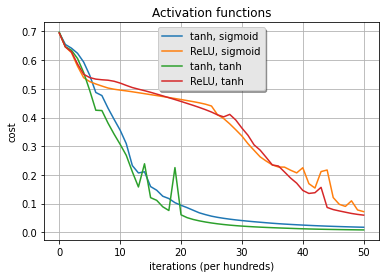

In [20]:
plt_costs(costs1,"tanh, sigmoid")
plt_costs(costs2,"ReLU, sigmoid")
plt_costs(costs3,"tanh, tanh")
plt_costs(costs4,"ReLU, tanh")
plt.title("Activation functions")
plt.grid()
plt.show()

Cost after iteration 0: 0.693147
Cost after iteration 500: 0.648432
Cost after iteration 1000: 0.644415
Cost after iteration 1500: 0.644019
Cost after iteration 2000: 0.643978
Cost after iteration 2500: 0.643974
Cost after iteration 3000: 0.643974
Cost after iteration 3500: 0.643974
Cost after iteration 4000: 0.643974
Cost after iteration 4500: 0.643974
Cost after iteration 5000: 0.643974
Train accuracy: 65%
Test accuracy: 34%

Cost after iteration 0: 0.693863
Cost after iteration 500: 0.525143
Cost after iteration 1000: 0.495579
Cost after iteration 1500: 0.479777
Cost after iteration 2000: 0.462702
Cost after iteration 2500: 0.440138
Cost after iteration 3000: 0.335570
Cost after iteration 3500: 0.234821
Cost after iteration 4000: 0.225002
Cost after iteration 4500: 0.121076
Cost after iteration 5000: 0.071977
Train accuracy: 97%
Test accuracy: 76%



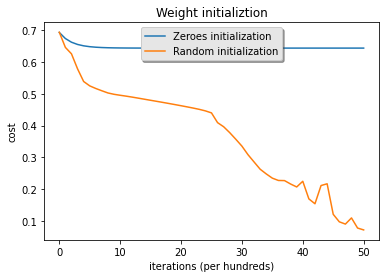

In [21]:
costs1, parameters1 = nn_model(X, Y, n_h = 4, active_1=ReLU,active_2=sigmoid, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=True)
print_accuracy(parameters1, activ_1=ReLU,activ_2=sigmoid)

costs2, parameters2 = nn_model(X, Y, n_h = 4, active_1=ReLU,active_2=sigmoid, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters2, activ_1=ReLU,activ_2=sigmoid)

plt_costs(costs1,"Zeroes initialization")
plt_costs(costs2,"Random initialization")
plt.title("Weight initializtion")
plt.show()

In [22]:
print("learning rate 0.0001")
costs1, parameters1 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.0001]],zeroes_initial=False)
print_accuracy(parameters1, activ_1=np.tanh,activ_2=tanh_out)


print("learning rate 0.001")
costs2, parameters2 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.001]],zeroes_initial=False)
print_accuracy(parameters2, activ_1=np.tanh,activ_2=tanh_out)


print("learning rate 0.01")
costs3, parameters3 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters3, activ_1=np.tanh,activ_2=tanh_out)


print("learning rate 0.1")
costs4, parameters4 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.1]],zeroes_initial=False)
print_accuracy(parameters4, activ_1=np.tanh,activ_2=tanh_out)

learning rate 0.0001
Cost after iteration 0: 0.697173
Cost after iteration 500: 0.692553
Cost after iteration 1000: 0.688669
Cost after iteration 1500: 0.685169
Cost after iteration 2000: 0.681816
Cost after iteration 2500: 0.678477
Cost after iteration 3000: 0.675111
Cost after iteration 3500: 0.671744
Cost after iteration 4000: 0.668443
Cost after iteration 4500: 0.665284
Cost after iteration 5000: 0.662338
Train accuracy: 65%
Test accuracy: 34%

learning rate 0.001
Cost after iteration 0: 0.697173
Cost after iteration 500: 0.662353
Cost after iteration 1000: 0.646697
Cost after iteration 1500: 0.641620
Cost after iteration 2000: 0.634278
Cost after iteration 2500: 0.622628
Cost after iteration 3000: 0.605036
Cost after iteration 3500: 0.582676
Cost after iteration 4000: 0.556207
Cost after iteration 4500: 0.526138
Cost after iteration 5000: 0.493252
Train accuracy: 77%
Test accuracy: 54%

learning rate 0.01
Cost after iteration 0: 0.697173
Cost after iteration 500: 0.494330
Cost aft

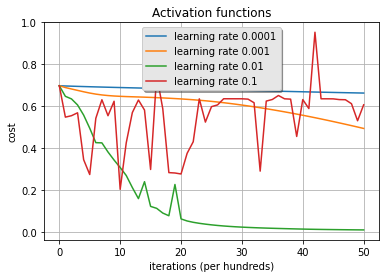

In [23]:
plt_costs(costs1,"learning rate 0.0001")
plt_costs(costs2,"learning rate 0.001")
plt_costs(costs3,"learning rate 0.01")
plt_costs(costs4,"learning rate 0.1")
plt.title("Activation functions")
plt.grid()
plt.show()

In [24]:
print("n_h = 4")
costs1, parameters1 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters1, activ_1=np.tanh,activ_2=tanh_out)


print("n_h = 8")
costs2, parameters2 = nn_model(X, Y, n_h = 8, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters2, activ_1=np.tanh,activ_2=tanh_out)


print("n_h = 16")
costs3, parameters3 = nn_model(X, Y, n_h = 16, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters3, activ_1=np.tanh,activ_2=tanh_out)


print("n_h = 32")
costs4, parameters4 = nn_model(X, Y, n_h = 32, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01]],zeroes_initial=False)
print_accuracy(parameters4, activ_1=np.tanh,activ_2=tanh_out)

n_h = 4
Cost after iteration 0: 0.697173
Cost after iteration 500: 0.494330
Cost after iteration 1000: 0.306493
Cost after iteration 1500: 0.120763
Cost after iteration 2000: 0.060908
Cost after iteration 2500: 0.032548
Cost after iteration 3000: 0.021676
Cost after iteration 3500: 0.016131
Cost after iteration 4000: 0.012292
Cost after iteration 4500: 0.009895
Cost after iteration 5000: 0.008351
Train accuracy: 100%
Test accuracy: 70%

n_h = 8
Cost after iteration 0: 0.696879
Cost after iteration 500: 0.477238
Cost after iteration 1000: 0.267278
Cost after iteration 1500: 0.089477
Cost after iteration 2000: 0.042794
Cost after iteration 2500: 0.026018
Cost after iteration 3000: 0.017960
Cost after iteration 3500: 0.013402
Cost after iteration 4000: 0.010528
Cost after iteration 4500: 0.008512
Cost after iteration 5000: 0.007032
Train accuracy: 100%
Test accuracy: 68%

n_h = 16
Cost after iteration 0: 0.688986
Cost after iteration 500: 0.419309
Cost after iteration 1000: 0.237887
Cost 

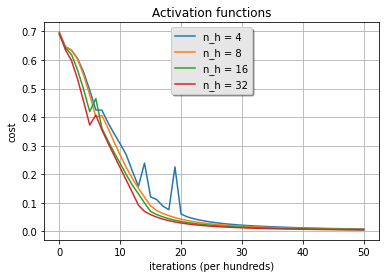

In [25]:
plt_costs(costs1,"n_h = 4")
plt_costs(costs2,"n_h = 8")
plt_costs(costs3,"n_h = 16")
plt_costs(costs4,"n_h = 32")
plt.title("Activation functions")
plt.grid()
plt.show()

In [26]:
print("learning rate 0.0001, 0.001, 0.01")
costs1, parameters1 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.0001], [0.001], [0.01]],zeroes_initial=False)
print_accuracy(parameters1, activ_1=np.tanh,activ_2=tanh_out)


print("learning rate 0.05, 0.025, 0.0125")
costs2, parameters2 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.05], [0.025], [0.0125]],zeroes_initial=False)
print_accuracy(parameters2, activ_1=np.tanh,activ_2=tanh_out)


print("learning rate 0.001, 0.005, 0.01")
costs3, parameters3 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.001], [0.005], [0.01]],zeroes_initial=False)
print_accuracy(parameters3, activ_1=np.tanh,activ_2=tanh_out)


print("learning rate 0.01, 0.02, 0.03")
costs4, parameters4 = nn_model(X, Y, n_h = 4, active_1=np.tanh,active_2=tanh_out, num_iterations = 5001, print_cost=True,Learning_rates=[[0.01], [0.02], [0.03]],zeroes_initial=False)
print_accuracy(parameters4, activ_1=np.tanh,activ_2=tanh_out)

learning rate 0.0001, 0.001, 0.01
Cost after iteration 0: 0.697173
Cost after iteration 500: 0.692553
Cost after iteration 1000: 0.688669
Cost after iteration 1500: 0.685169
Cost after iteration 2000: 0.662359
Cost after iteration 2500: 0.646697
Cost after iteration 3000: 0.641622
Cost after iteration 3500: 0.583167
Cost after iteration 4000: 0.375691
Cost after iteration 4500: 0.364744
Cost after iteration 5000: 0.068641
Train accuracy: 99%
Test accuracy: 68%

learning rate 0.05, 0.025, 0.0125
Cost after iteration 0: 0.697173
Cost after iteration 500: 0.437103
Cost after iteration 1000: 0.346743
Cost after iteration 1500: 0.238103
Cost after iteration 2000: 0.101182
Cost after iteration 2500: 0.095960
Cost after iteration 3000: 0.093616
Cost after iteration 3500: 0.092245
Cost after iteration 4000: 0.090864
Cost after iteration 4500: 0.084070
Cost after iteration 5000: 0.082683
Train accuracy: 96%
Test accuracy: 76%

learning rate 0.001, 0.005, 0.01
Cost after iteration 0: 0.697173
Co

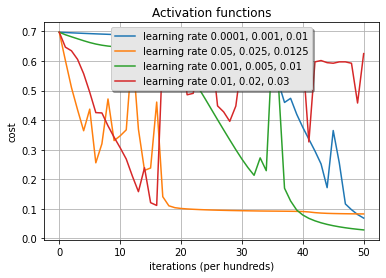

In [27]:
plt_costs(costs1,"learning rate 0.0001, 0.001, 0.01")
plt_costs(costs2,"learning rate 0.05, 0.025, 0.0125")
plt_costs(costs3,"learning rate 0.001, 0.005, 0.01")
plt_costs(costs4,"learning rate 0.01, 0.02, 0.03")
plt.title("Activation functions")
plt.grid()
plt.show()